In [1]:
PageUrl = "https://in.indeed.com/jobs?q=machine%20learning&l=India&fromage=14&start={}"

In [2]:
from selenium import webdriver
from time import sleep
from bs4 import BeautifulSoup

In [3]:
 Driver = webdriver.Chrome("./chromedriver.exe")

In [4]:
## Data we want to collect (Store)
Titles = []
Locations = []
Companies = []
Salaries = []
JobDetails = []

In [ ]:
for pageNum in range(0, 200, 10):
    Driver.get(PageUrl.format(pageNum))
    cards = None
    while True:
        cards = Driver.find_elements_by_class_name("result")
        break
        
    for card in cards:
        details = BeautifulSoup(card.get_attribute('innerHTML'), 'html.parser')
        
        try:
            title = details.find('a', class_ = "jobtitle").text.replace("\n", "").strip()
            Titles.append(title)
        except:
            Titles.append(None)
            
            
        try:
            location = details.find(class_ = "location").text.replace("\n", "").strip()
            Locations.append(location)
        except:
            Locations.append(None)
            
        try:
            company = details.find(class_ = "company").text.replace("\n", "").strip()
            Companies.append(company)
        except:
            Companies.append(None)
            
        
        try:
            salary = details.find(class_ = "salary").text.replace("\n", "").strip()
            Salaries.append(salary)
        except:
            Salaries.append(None)
        
        while True:
            try:
                card.click()
                sleep(1)
                try:
                    Des = Driver.find_element_by_id("vjs-tab-job")
                    DesHTML = BeautifulSoup(Des.get_attribute('innerHTML'), 'html.parser')
                    all_li = DesHTML.find_all("li")
                    all_li_text = ""
                    for Li in all_li:
                        all_li_text += Li.text.replace("\n", "")
                        all_li_text += " "
                    JobDetails.append(all_li_text)
                except:
                    JobDetails.append(None)
                break
            except:
                pass

In [6]:
import pandas as pd

In [18]:
df = pd.DataFrame({
    "Title":Titles,
    "Location":Locations,
    "Company":Companies,
    "Salary":Salaries,
    "Details":JobDetails
    
})

df[df.Title.str.contains(pat = 'Machine Learning')].dropna()

,Title,Location,Company,Salary,Details
0,Machine Learning Engineer,"Delhi, Delhi",VNU SOFTWARE Pvt Ltd.,"₹25,000 - ₹40,000 a month",Predictive Analysis Statistical Modeling Data ...
4,Machine Learning Engineer,"Ahmedabad, Gujarat",Azine Web Technologies,"₹20,000 - ₹30,000 a month",Experience with Machine Learning and Deep Lear...
13,Machine Learning Trainee,"Bengaluru, Karnataka",ABI Health Technologies,"₹20,000 - ₹30,000 a month",Day shift Machine Learning: 1 year (Preferred)...
21,Machine Learning Engineer,"Hyderabad, Telangana",SuccessMetric,"₹5,00,000 - ₹6,20,000 a year",Paid time off Work from home Day shift Machine...
22,Software Engineer Machine Learning & Computer ...,"Gurgaon, Haryana",Lizmotors Mobility Pvt Ltd.,"₹3,00,000 - ₹12,00,000 a year",Work from home Monday to Friday Bachelor's (Pr...
25,Machine Learning Engineer,"Pune, Maharashtra",Regent Climate Connect Knowledge Solutions Pri...,"₹7,00,000 - ₹12,00,000 a year",Results-oriented. You can meet tight deadlines...


In [13]:
df.Title.values

array(['Machine Learning Engineer', 'Data Engineer - Machine Learning',
       'Data Scientist / Machine Learning Engineer',
       'Machine Learning Engineer', 'Machine Learning Engineer',
       'Customer Engineer, Machine Learning, Google Cloud',
       'Research Engineer - Machine Vision',
       'EY-Consulting - Data and Analytics – statistical/machine lea...',
       'Engineer- Deep Learning', 'Technical Analyst - Machine Learning',
       'Machine Learning Developer',
       'Machine Learning Engineers (MLE-2, MLE-3)', 'Machine Learning',
       'Machine Learning Trainee', 'Data Science Intern',
       'EY-Consulting - Data and Analytics – statistical/machine lea...',
       'Machine Learning Engineer',
       'Customer Engineer, Machine Learning, Google Cloud',
       'Machine Learning', 'Data Scientist - GoMerchant',
       'Developer/\u200b\u200b\u200b\u200b\u200b\u200b\u200bMachine Learning Engineer (Java/Python)',
       'Machine Learning Engineer',
       'Software Enginee

##### Similarly  Scrape the data for these Keywords...
1. Machine Learning
2. Artificial Intelligence
3. Data Science
4. Data Analyticc
5. Web Development
6. ReactJs

In [51]:
### Data Analysis Part Start....

In [53]:
df1 = pd.read_csv("DataSets/ai.csv")
df2 = pd.read_csv("DataSets/data_analyst.csv")
df3 = pd.read_csv("DataSets/datascience2.csv")
df4 = pd.read_csv("DataSets/machinelearning.csv")

In [54]:
df = pd.concat([df1, df2, df3, df4], axis=0)

In [56]:
df = df.drop_duplicates()

In [59]:
df.columns

Index(['Unnamed: 0', 'Title', 'Location', 'Company', 'Salary', 'Sponsored',
       'Description'],
      dtype='object')

In [68]:
## Companies who have max jobs..
CompanyGroup = df.groupby("Company").count()["Title"].sort_values(ascending = False)[:15]

In [69]:
CompanyGroup

Company
Micro Focus             28
Telstra                 14
TARGET                  13
SAP                     12
Covance                 11
Paypal                  11
Infosys                 11
Akamai                  10
JP Morgan Chase         10
Wells Fargo              9
HERE Technologies        8
Fidelity Investments     8
Pitney Bowes             7
Accenture                7
CommScope                6
Name: Title, dtype: int64

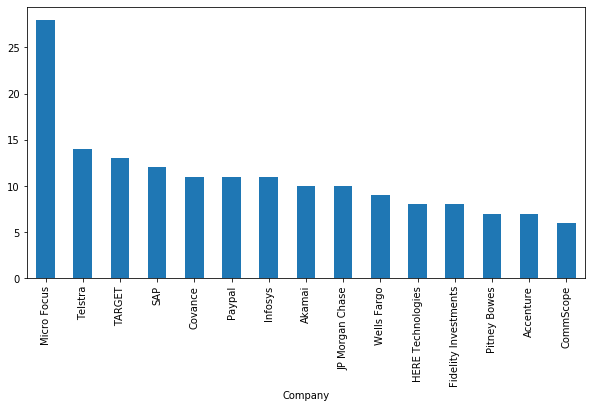

In [72]:
CompanyGroup.plot(kind = "bar", figsize = (10, 5))

In [73]:
### apply some NLP and work with JobDetails

In [75]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [92]:
stop_words = stopwords.words('english')
stop_words.append(".")
stop_words.append(",")
stop_words.append("(")
stop_words.append(")")
stop_words.append("@")
stop_words.append("!")
stop_words.append("[")
stop_words.append("]")
stop_words.append("-")

In [94]:
def CleanData(desc):
    words = word_tokenize(str(desc))
    imp_words = []
    for word in words:
        lower = word.lower()
        if lower not in stop_words:
            imp_words.append(lower)
    return imp_words
        

In [97]:
dfDes = df.Description.dropna()

In [99]:
Tags = dfDes.apply(CleanData)

In [101]:
resultCount = Tags.apply(Counter).sum().items()

In [109]:
resultCount = sorted(resultCount, key = lambda s: s[1], reverse=True)

In [111]:
resultData = pd.Series({
    K:V for K,V in resultCount
})

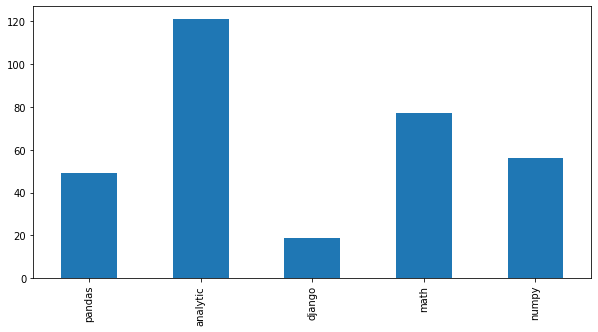

In [121]:
skils = ["pandas", "analytic", "django","math", "numpy"]
FilteredData = resultData.filter(items=skils)
FilteredData.plot(kind = "bar", figsize = (10, 5))